# Naive Bayes Classifier

**` Author : Alhasan Gamal Mahmoud `**

**` Date   : 21 - 04 - 2022 `**

**In this Script, I will develop a python program that is able to Understand `Naive Bayes consept` and implementation it with different Case Study**
<br>


<img src="https://miro.medium.com/max/1400/1*PFTMCvOIPChMEcgtVS0RBQ.jpeg">

### What is a classifier?

A classifier is a machine learning model that is used to discriminate different objects based on certain features.

### Principle of Naive Bayes Classifier:

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem.

### Bayes Theorem:
\begin{equation}
P(A \mid B) = \frac{P(B \mid A)P(A)}{P(B)}
\end{equation}
<br>
Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence, it is called naive.

### Example to understanding
<br>
<img src="https://miro.medium.com/max/1400/1*oR4RsdQsbp_zzGzzwblq0Q.png">
<br>
We classify whether the day is suitable for playing golf, given the features of the day. The columns represent these features and the rows represent individual entries. If we take the first row of the dataset, we can observe that is not suitable for playing golf if the outlook is rainy, temperature is hot, humidity is high, and it is not windy. We make two assumptions here, one as stated above we consider that these predictors are independent. That is, if the temperature is hot, it does not necessarily mean that the humidity is high. Another assumption made here is that all the predictors have an equal effect on the outcome. That is, the day being windy does not have more importance in deciding to play golf or not.

<br>
According to this example, Bayes theorem can be rewritten as:
\begin{equation}
P(y \mid X) = \frac{P(X \mid y)P(y)}{P(X)}
\end{equation}
<br>
The variable y is the class variable(play golf), which represents if it is suitable to play golf or not given the conditions. Variable X represent the parameters/features.


<hr>
X is given as,
\begin{equation}
X = (x_1,x_2,x_3,\cdots,x_n)
\end{equation}
<br>
Here $x_1,x_2….x_n$ represent the features, i.e they can be mapped to outlook, temperature, humidity and windy. By substituting for X and expanding using the chain rule we get,
\begin{equation}
P(y \mid x_1,\cdots,x_n) = \frac{P(x_1 \mid y)P(x_2 \mid y) \cdots P(x_n \mid y)P(y)}{P(x_1)P(x_2) \cdots P(x_n)}
\end{equation}
<br>
Now, you can obtain the values for each by looking at the dataset and substitute them into the equation. For all entries in the dataset, the denominator does not change, it remain static. Therefore, the denominator can be removed and a proportionality can be introduced.
\begin{equation}
P(y \mid x_1,\cdots,x_n) \propto P(y) \prod \limits _{i=1} ^{n} P(x_i \mid y)
\end{equation}
<br>
In our case, the class variable(y) has only two outcomes, yes or no. There could be cases where the classification could be multivariate. Therefore, we need to find the class y with maximum probability.
\begin{equation}
y = armax_y(P(y) \prod \limits _{i=1} ^{n} P(x_i \mid y))
\end{equation}
<br>
Using the above function, we can obtain the class, given the predictors.

## Types of Naive Bayes Classifier:

### Multinomial Naive Bayes:

This is mostly used for document classification problem, i.e whether a document belongs to the category of sports, politics, technology etc. The features/predictors used by the classifier are the frequency of the words present in the document.

### Bernoulli Naive Bayes:

This is similar to the multinomial naive bayes but the predictors are boolean variables. The parameters that we use to predict the class variable take up only values yes or no, for example if a word occurs in the text or not.

### Gaussian Naive Bayes:

When the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution.

<img src="https://miro.medium.com/max/844/1*AYsUOvPkgxe3j1tEj2lQbg.gif">

<br>
Since the way the values are present in the dataset changes, the formula for conditional probability changes to,
\begin{equation}
P(x_i \mid y) = \frac{1}{\sqrt{2 \pi \sigma_y^2}} exp(- \frac{(x_i - \mu_y)^2}{2 \sigma_y^2})
\end{equation}



### Conclusion
Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

## Implementation of Naive Bayes
### Case Study 1
<br>
We are using the Social network ad dataset. The dataset contains the details of users in a social networking site to find whether a user buys a product by clicking the ad on the site based on their salary, age, and gender.
<br>

For more information on the DataSet visit [here](https://www.kaggle.com/datasets/rakeshrau/social-network-ads).


**Let’s start the programming by importing essential libraries required**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score

**Importing DataSet**

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Show information about Data**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


**Show Statistic Summary**

In [4]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


**Split Data to Features and Label**

In [5]:
features = data.iloc[:,1:4].values
label    = data.iloc[:,4].values

**Since our dataset containing character variables we have to encode it using `LabelEncoder()`**

In [6]:
le = LabelEncoder()
features[:,0] = le.fit_transform(features[:,0])

**We are performing a `train test split()` on our dataset. We are providing the test size as 0.20, that means our training sample contains 320 training set and test sample contains 80 test set**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.2, random_state = 0)

**Next, we are doing feature scaling to the training and test set of independent variables**

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

**Training the Naive Bayes model on the training set**

In [9]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

**Let’s predict the test results**

In [10]:
y_pred = classifier.predict(X_test)

**We can evaluate our model using the `confusion matrix` and `accuracy score` by comparing the predicted and actual test values**

Accuracy Score : 0.925
Confusion Metrix :


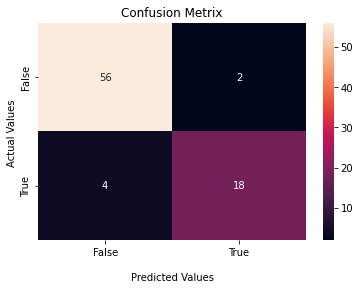

In [11]:
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy Score : {ac}")

ax = sns.heatmap(cm,annot=True)
ax.set_title("Confusion Metrix")
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
print("Confusion Metrix :")
plt.show()

### Case Study 2
<br>
One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. We discussed the extraction of such features from text in Feature Engineering; here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

**Let’s download the data and take a look at the target names:**

In [12]:
from sklearn.datasets import fetch_20newsgroups

df = fetch_20newsgroups()
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

**For simplicity here, we will select just a few of these categories, and download the training and testing set:**

In [13]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

**Here is a representative entry from the data:**

In [14]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



**In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer (discussed in Feature Engineering), and create a pipeline that attaches it to a multinomial naive Bayes classifier:**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

**With this pipeline, we can apply the model to the training data, and predict labels for the test data:**

In [16]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

**Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, here is the confusion matrix between the true and predicted labels for the test data:**

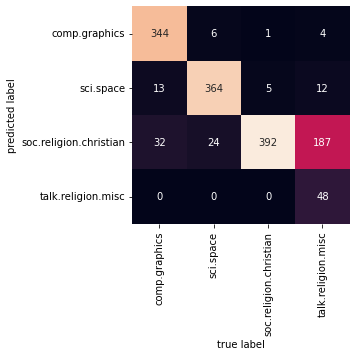

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

**Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity. This is perhaps an expected area of confusion!
The very cool thing here is that we now have the tools to determine the category for any string, using the `predict()` method of this pipeline. Here’s a quick utility function that will return the prediction for a single string:**

In [18]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

**Let’s try it out:**

In [19]:
predict_category('sending a payload to the ISS')

'sci.space'

In [20]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [21]:
predict_category('determining the screen resolution')

'comp.graphics'

**Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.
Even a very naive algorithm, when used carefully and trained on a large set of high-dimensional data, can be surprisingly effective.**